In [171]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [172]:
df = sns.load_dataset('titanic')

In [173]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [174]:
df.shape

(891, 15)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [176]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

## Problems with the dataset 
1. multicolinearity exists , many feature are giving the same kinda info
    1. survived & alive
    2. sex & who & adult_male (mostly)
    3. pclass & class & deck
    4. embarked & embark_town
2. My Words
    1. (survived & alive) & (embarked & embark_town) are pure multicoliner , drop the one whose dtype is object
    2. for (sex & who & adult_male) 
        - for (sex & who) they are exact same , but there is a twist who tells us if it is man , woman or child .
        - all togetherc i.e(sex & who) tells us if a persona gender is male or female and if he is adult male or adult female or child male or child female .
        - so i suggest making a new column named as 'isAdult' 
        - we will use who and sex -> man = 1 , woman = 1 , child = 0
        - and then drop who & adult_male column
        - this way model will know who survive more adult male or female and child male or female . 

In [178]:
df[['alive','survived','alone']].sample(5)

,alive,survived,alone
350,no,0,True
774,yes,1,False
629,no,0,True
522,no,0,True
714,no,0,True


In [179]:
df[['sex','who','adult_male']][df['age'].isnull()]

,sex,who,adult_male
5,male,man,True
17,male,man,True
19,female,woman,False
26,male,man,True
28,female,woman,False
...,...,...,...
859,male,man,True
863,female,woman,False
868,male,man,True
878,male,man,True


In [180]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [181]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [182]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [183]:
df = df.drop(columns=['alive','embarked','class'])

In [184]:
df['sex'] = (
    df['sex']
      .str.strip()
      .str.lower()
      .map({'female': 0, 'male': 1})
      .astype(int)
)
df = df.rename(columns={'sex':'isMale'})

In [185]:
df[(df['who'] == 'child') & df['age'].isna()] # this means all missing age is of adult

,survived,pclass,isMale,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone


In [186]:
# 1️⃣ Flags
df['is_age_missing'] = df['age'].isna().astype(int)

In [187]:
# verify
df['is_age_missing'].value_counts()

is_age_missing
0    714
1    177
Name: count, dtype: int64

In [188]:
# 2️⃣ Age
age_means = df.groupby(['pclass', 'isMale'])['age'].mean()
age_means

pclass  isMale
1       0         34.611765
        1         41.281386
2       0         28.722973
        1         30.740707
3       0         21.750000
        1         26.507589
Name: age, dtype: float64

In [189]:
df['age'] = df['age'].fillna(
    df.groupby(['pclass', 'isMale'])['age'].transform('mean')
)
# FallBack if some age is still remaining 
# df['age'] = df['age'].fillna(df['age'].median())

In [190]:
df[df['embark_town'].isnull()]

,survived,pclass,isMale,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone,is_age_missing
61,1,1,0,38.0,0,0,80.0,woman,False,B,NaN,True,0
829,1,1,0,62.0,0,0,80.0,woman,False,B,NaN,True,0


In [191]:
# 3️⃣ Embark town
df['embark_town'] = df['embark_town'].fillna(
    df['embark_town'].mode()[0]
)

In [192]:
# 4️⃣ Deck
df['deck'] = (
    df['deck']
      .cat.add_categories('Unknown')
      .fillna('Unknown')
)

> Solution of NaN
1. age 
    - Instead of filling NaN with mean is just Dumb
    - fill with respect of class and gender 
    - ex. a female in class 1 and 3rd might have different mean age 
    - we will also add a indicator or label , so that it knows if the value is real or guessed
2. for 77% missing data in deck
    - create a new categoty as deck is unknown -> 'U'

In [193]:
df.isnull().sum()

survived          0
pclass            0
isMale            0
age               0
sibsp             0
parch             0
fare              0
who               0
adult_male        0
deck              0
embark_town       0
alone             0
is_age_missing    0
dtype: int64

In [194]:
df['isAdult'] = (df['who'] != 'child').astype(int)

In [195]:
df['familySize'] = df['parch'] + df['sibsp'] + 1

In [196]:
df = df.drop(columns=['who','adult_male'])

In [197]:
df['alone'] = df['alone'].astype(int)

In [198]:
df['deck'].unique()

['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [199]:
df['fare_log'] = np.log1p(df['fare'])

In [200]:
df.head()

,survived,pclass,isMale,age,sibsp,parch,fare,deck,embark_town,alone,is_age_missing,isAdult,familySize,fare_log
0,0,3,1,22.0,1,0,7.2500,Unknown,Southampton,0,0,1,2,2.110213
1,1,1,0,38.0,1,0,71.2833,C,Cherbourg,0,0,1,2,4.280593
2,1,3,0,26.0,0,0,7.9250,Unknown,Southampton,1,0,1,1,2.188856
3,1,1,0,35.0,1,0,53.1000,C,Southampton,0,0,1,2,3.990834
4,0,3,1,35.0,0,0,8.0500,Unknown,Southampton,1,0,1,1,2.202765


In [201]:
df[(df['fare'] == 0)].shape

(15, 14)

<Axes: xlabel='fare_log', ylabel='Count'>

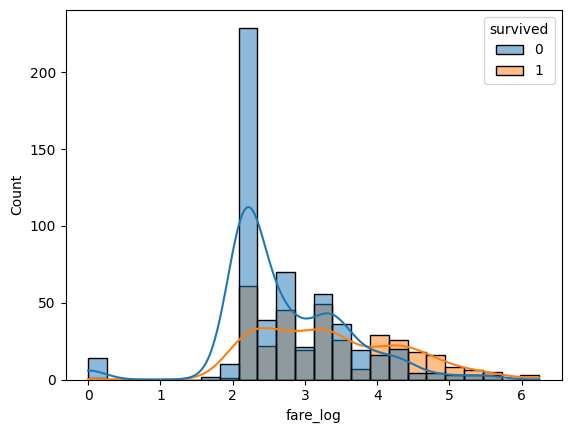

In [202]:
sns.histplot(x=df['fare_log'],kde=True,hue=df['survived'])

In [203]:
X = df.drop(columns=['survived','fare'])
X.shape

(891, 12)

In [204]:
Y = df['survived']
Y.shape

(891,)

- Splitting the data

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    X,Y,
    test_size=0.2,
    random_state=42,
    stratify=Y # Ensures balanced split for classification
    )

In [206]:
x_train.columns

Index(['pclass', 'isMale', 'age', 'sibsp', 'parch', 'deck', 'embark_town',
       'alone', 'is_age_missing', 'isAdult', 'familySize', 'fare_log'],
      dtype='object')

- Encoding

In [207]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
).set_output(transform='pandas')

x_train_encoded = encoder.fit_transform(
    x_train[['deck', 'embark_town']]
)

x_test_encoded = encoder.transform(
    x_test[['deck', 'embark_town']]
)

In [208]:
x_train_encoded.shape

(712, 11)

- 👆👆👆👆👆 is Blunder as , we have to manulay concat the remaing and encoded feature 
- here comes 'ColumnTransformatio' comes in action 

In [209]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore'
        ), ['deck', 'embark_town'])
    ],
    remainder='passthrough',   # ⬅️ THIS keeps other columns
    verbose_feature_names_out=False   # 🔥 THIS is For saying 'No to ugly column names'
).set_output(transform='pandas')

x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

In [210]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = ColumnTransformer(
    transformers=[
        ('scale',StandardScaler(

        ),['age','fare_log'])
    ],
    remainder='passthrough',   # ⬅️ THIS keeps other columns
    verbose_feature_names_out=False   # 🔥 THIS is For saying 'No to ugly column names'
).set_output(transform='pandas')

x_train_encoded_scaled = scaler.fit_transform(x_train_encoded)
x_test_encoded_scaled = scaler.transform(x_test_encoded)

In [211]:
x_train_encoded_scaled.shape

(712, 21)

### Using single PipeLine

In [212]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age','fare_log']),
        ('cat', OneHotEncoder(
            handle_unknown='ignore',
            sparse_output=False
        ), ['deck','embark_town'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

x_train_final = preprocessor.fit_transform(x_train)
x_test_final = preprocessor.transform(x_test)

In [213]:
x_train_final.shape 

(712, 21)

- Manual Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=3)

model.fit(x_train_final, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [215]:
y_pred = model.predict(x_test_final)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [216]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test_final)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.8044692737430168


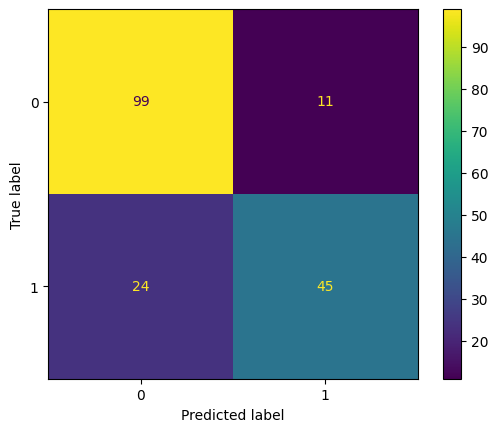

In [217]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

In [218]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [219]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(x_test_final)[:, 1]
auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC:", auc)

ROC-AUC: 0.8134387351778656


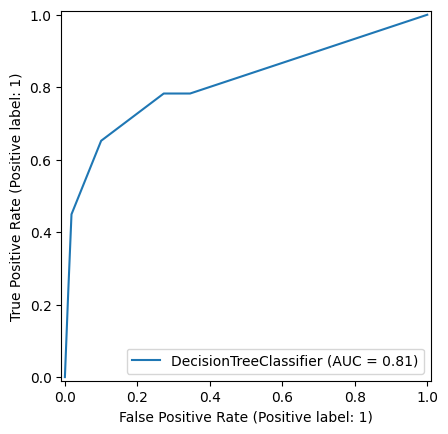

In [220]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(
    model, x_test_final, y_test
)
plt.show()

In [221]:
print("Train accuracy:", model.score(x_train_final, y_train))
print("Test accuracy:", model.score(x_test_final, y_test))

Train accuracy: 0.8286516853932584
Test accuracy: 0.8044692737430168
